In [167]:
!pip install descartes

In [169]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 7.5 MB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 5.9 MB/s eta 0:00:01    |████████████▏                   | 7.4 MB 6.5 MB/s eta 0:00:02
     |████████████████████████████████| 1.0 MB 4.6 MB/s eta 0:00:01


In [170]:
#Loading necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

## Question 2

In [106]:
#Loading dataset
df = pd.read_csv("water-treatment.csv")

In [107]:
#Looking at first 5 rows of the dataframe
df.head()

,date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101.0,1.5,7.8,NaN,407.0,166.0,66.3,4.5,2110,...,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,D-2/3/90,39024.0,3.0,7.7,NaN,443.0,214.0,69.2,6.5,2660,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
2,D-4/3/90,32229.0,5.0,7.6,NaN,528.0,186.0,69.9,3.4,1666,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,D-5/3/90,35023.0,3.5,7.9,205.0,588.0,192.0,65.6,4.5,2430,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,D-6/3/90,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110,...,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5


In [108]:
df.shape

(527, 39)

In [109]:
#Verifying datatypes
df.dtypes

date         object
Q-E         float64
ZN-E        float64
PH-E        float64
DBO-E       float64
DQO-E       float64
SS-E        float64
SSV-E       float64
SED-E       float64
COND-E        int64
PH-P        float64
DBO-P       float64
SS-P          int64
SSV-P       float64
SED-P       float64
COND-P        int64
PH-D        float64
DBO-D       float64
DQO-D       float64
SS-D        float64
SSV-D       float64
SED-D       float64
COND-D        int64
PH-S        float64
DBO-S       float64
DQO-S       float64
SS-S        float64
SSV-S       float64
SED-S       float64
COND-S      float64
RD-DBO-P    float64
RD-SS-P     float64
RD-SED-P    float64
RD-DBO-S    float64
RD-DQO-S    float64
RD-DBO-G    float64
RD-DQO-G    float64
RD-SS-G     float64
RD-SED-G    float64
dtype: object

In [110]:
#counting null values in each column
for column in df.columns:
    print(column,df[column].isnull().sum())

date 0
Q-E 18
ZN-E 3
PH-E 0
DBO-E 23
DQO-E 6
SS-E 1
SSV-E 11
SED-E 25
COND-E 0
PH-P 0
DBO-P 40
SS-P 0
SSV-P 11
SED-P 24
COND-P 0
PH-D 0
DBO-D 28
DQO-D 9
SS-D 2
SSV-D 13
SED-D 25
COND-D 0
PH-S 1
DBO-S 23
DQO-S 18
SS-S 5
SSV-S 17
SED-S 28
COND-S 1
RD-DBO-P 62
RD-SS-P 4
RD-SED-P 27
RD-DBO-S 40
RD-DQO-S 26
RD-DBO-G 36
RD-DQO-G 25
RD-SS-G 8
RD-SED-G 31


In [111]:
#Removing NaN values by replacing them with the mean.
df = df.fillna(df.mean())

/Users/vishal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [112]:
#Making sure there are no missing values
df.isnull().sum()

date        0
Q-E         0
ZN-E        0
PH-E        0
DBO-E       0
DQO-E       0
SS-E        0
SSV-E       0
SED-E       0
COND-E      0
PH-P        0
DBO-P       0
SS-P        0
SSV-P       0
SED-P       0
COND-P      0
PH-D        0
DBO-D       0
DQO-D       0
SS-D        0
SSV-D       0
SED-D       0
COND-D      0
PH-S        0
DBO-S       0
DQO-S       0
SS-S        0
SSV-S       0
SED-S       0
COND-S      0
RD-DBO-P    0
RD-SS-P     0
RD-SED-P    0
RD-DBO-S    0
RD-DQO-S    0
RD-DBO-G    0
RD-DQO-G    0
RD-SS-G     0
RD-SED-G    0
dtype: int64

In [113]:
df_corr = df.corr()
df_corr = df_corr[['PH-S','DBO-S','DQO-S','SS-S','SSV-S','SED-S','COND-S']].loc[['PH-E','DBO-E','DQO-E','SS-E','SSV-E','SED-E','COND-E']]

<AxesSubplot:>

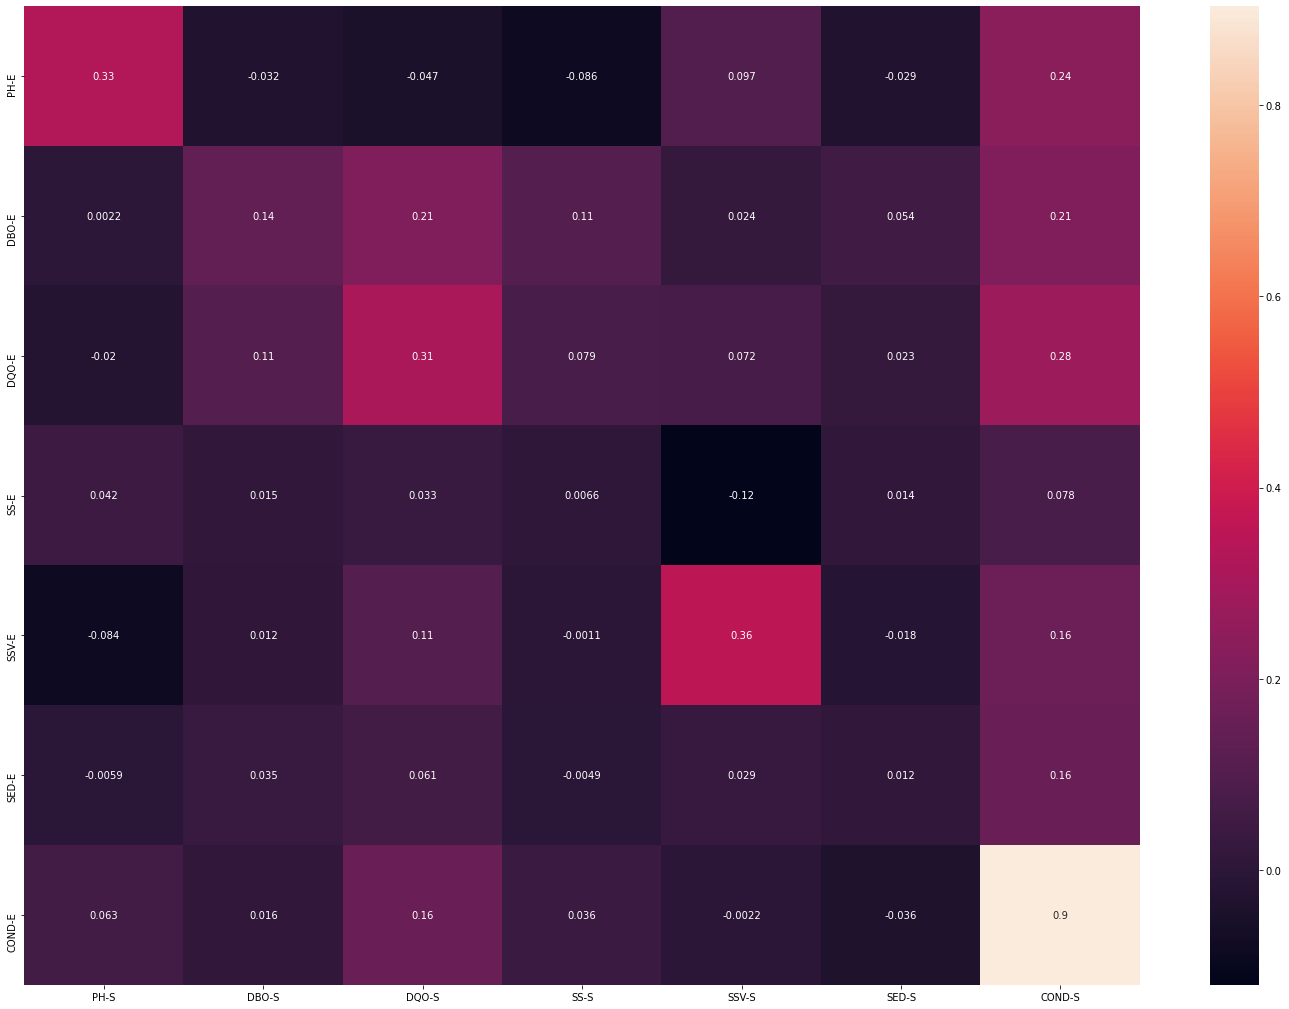

In [114]:
#Finding correlation between input and output features
plt.figure(figsize=(25,18))
sns.heatmap(df_corr, annot=True)

<AxesSubplot:>

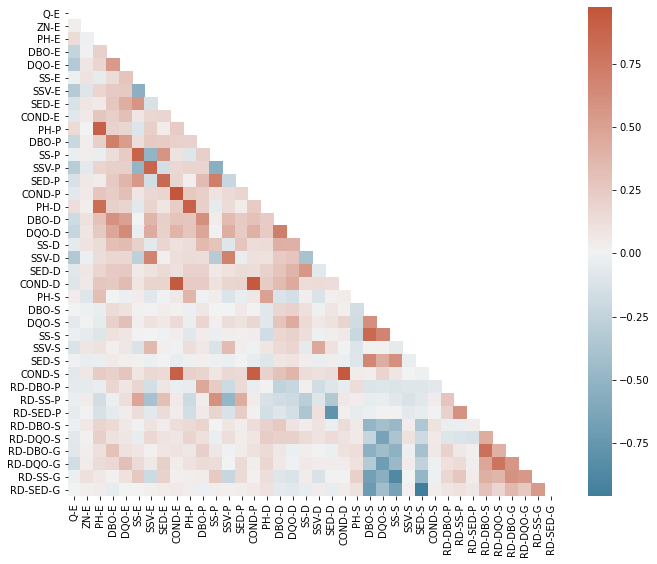

In [115]:
#Correlation between all features
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(), mask=mask, cmap=cmap, square=True)

In [119]:
safeph = list()
for ph in df['PH-S'].values.tolist():
    ph = float(ph)
    #considering this as the safe range of ph
    if(ph>=6.5 and ph<=7.7):
        safeph.append(1)
    else:
        safeph.append(0)

In [120]:
df['SAFE-PH-S'] = safeph

In [122]:
df['SAFE-PH-S'].value_counts()

1    310
0    217
Name: SAFE-PH-S, dtype: int64

In [146]:
#Split Into Training and Testing Sets
#Separate out the features and targets
features = df.drop(columns=['SAFE-PH-S','date', 'COND-S', 'PH-S']) #Removing highly correlated feature
targets = pd.DataFrame(df['SAFE-PH-S'])

In [147]:
def tencrossval(model,x_train, y_train):
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    return 0

def logreg(X,y):
    print("----------Classification 01 - Logistic Regression----------")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = LogisticRegression().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    tencrossval(clf, X_train, y_train)

def svm(X,y):
    print("----------Classification 02 - Support Vector Machine----------")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    svm = SVC(C = 1000, gamma = 0.1)
    clf = svm.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    tencrossval(clf, X_train, y_train)

In [148]:
logreg(features,targets)
svm(features, targets)

----------Classification 01 - Logistic Regression----------
              precision    recall  f1-score   support

           0       0.70      0.39      0.50        49
           1       0.62      0.86      0.72        57

    accuracy                           0.64       106
   macro avg       0.66      0.62      0.61       106
weighted avg       0.66      0.64      0.62       106



/Users/vishal/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/vishal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 0.594 (0.062)
----------Classification 02 - Support Vector Machine----------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.54      1.00      0.70        57

    accuracy                           0.54       106
   macro avg       0.27      0.50      0.35       106
weighted avg       0.29      0.54      0.38       106

Accuracy: 0.601 (0.067)


/Users/vishal/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/vishal/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vishal/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vishal/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.

## Question 3

In [81]:
water_atlas = pd.read_csv('WaterAtlas-ManySites.csv', error_bad_lines=False)

/Users/vishal/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 4: expected 17 fields, saw 18\nSkipping line 7: expected 17 fields, saw 18\nSkipping line 9: expected 17 fields, saw 18\nSkipping line 10: expected 17 fields, saw 18\nSkipping line 17: expected 17 fields, saw 18\nSkipping line 23: expected 17 fields, saw 18\nSkipping line 25: expected 17 fields, saw 18\nSkipping line 26: expected 17 fields, saw 18\nSkipping line 27: expected 17 fields, saw 18\nSkipping line 28: expected 17 fields, saw 18\nSkipping line 29: expected 17 fields, saw 18\nSkipping line 30: expected 17 fields, saw 19\nSkipping line 31: expected 17 fields, saw 18\nSkipping line 32: expected 17 fields, saw 18\nSkipping line 33: expected 17 fields, saw 18\nSkipping line 42: expected 17 fields, saw 18\nSkipping line 5

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [82]:
water_atlas.head()

,DataSourceName,DataSourceCode,StationID,ActualStationID,Latitude_DD,Longitude_DD,SampleDate,SampleTime,ActivityDepth,ActivityDepthUnit,Characteristic,ResultValue,ResultUnit,ValueQualifier,ResultComment,WaterbodyID,WaterbodyName
0,LAKEWATCH Supplemental Water Quality Sampling,LAKEWATCH_SUPP,Bugg Springs-Lake,NaN,28.75361,-81.90444,1991-08-18 00:00:00.000,00:00:00,NaN,NaN,pH,7.5,None,NaN,NaN,8509,Bugg Spring
1,LAKEWATCH Supplemental Water Quality Sampling,LAKEWATCH_SUPP,Bugg Springs-Lake,NaN,28.75361,-81.90444,1991-08-18 00:00:00.000,00:00:00,NaN,NaN,Phosphorus as P,70.0,ug/l,NaN,NaN,8509,Bugg Spring
2,LAKEWATCH Supplemental Water Quality Sampling,LAKEWATCH_SUPP,Bugg Springs-Lake,NaN,28.75361,-81.90444,1991-08-18 00:00:00.000,00:00:00,NaN,NaN,Specific conductance,270.0,umho,NaN,NaN,8509,Bugg Spring
3,LAKEWATCH Supplemental Water Quality Sampling,LAKEWATCH_SUPP,Bugg Springs-Lake,NaN,28.75361,-81.90444,1991-08-18 00:00:00.000,00:00:00,NaN,NaN,Nitrogen,670.0,ug/l,NaN,NaN,8509,Bugg Spring
4,LAKEWATCH Supplemental Water Quality Sampling,LAKEWATCH_SUPP,Bugg Springs-Lake,NaN,28.75361,-81.90444,1991-08-18 00:00:00.000,00:00:00,NaN,NaN,Sodium,5.0,mg/l,NaN,NaN,8509,Bugg Spring


In [87]:
df_ph = water_atlas[water_atlas['Characteristic']=='pH']
df_ph.head()

,DataSourceName,DataSourceCode,StationID,ActualStationID,Latitude_DD,Longitude_DD,SampleDate,SampleTime,ActivityDepth,ActivityDepthUnit,Characteristic,ResultValue,ResultUnit,ValueQualifier,ResultComment,WaterbodyID,WaterbodyName
0,LAKEWATCH Supplemental Water Quality Sampling,LAKEWATCH_SUPP,Bugg Springs-Lake,NaN,28.75361,-81.90444,1991-08-18 00:00:00.000,00:00:00,NaN,NaN,pH,7.5,None,NaN,NaN,8509,Bugg Spring
13,LAKEWATCH Supplemental Water Quality Sampling,LAKEWATCH_SUPP,Bugg Springs-Lake,NaN,28.75361,-81.90444,1991-03-10 00:00:00.000,00:00:00,NaN,NaN,pH,7.7,None,NaN,NaN,8509,Bugg Spring
40,LAKEWATCH Supplemental Water Quality Sampling,LAKEWATCH_SUPP,Bugg Springs-Lake,NaN,28.75361,-81.90444,1991-08-18 00:00:00.000,00:00:00,NaN,NaN,pH,7.6,None,NaN,NaN,8509,Bugg Spring
59,LAKEWATCH Supplemental Water Quality Sampling,LAKEWATCH_SUPP,Church-Lake,NaN,28.64625,-81.84342,1995-02-13 00:00:00.000,00:00:00,NaN,NaN,pH,5.9,None,NaN,NaN,7844,Church Lake
70,LAKEWATCH Supplemental Water Quality Sampling,LAKEWATCH_SUPP,Turkey-Lake,NaN,28.70128,-81.85039,1995-02-13 00:00:00.000,00:00:00,NaN,NaN,pH,6.1,None,NaN,NaN,8186,Turkey Lake


In [88]:
df_ph.shape

(472, 17)

In [89]:
df_ph.isnull().sum()

DataSourceName         0
DataSourceCode         0
StationID              0
ActualStationID      468
Latitude_DD            0
Longitude_DD           0
SampleDate             0
SampleTime            86
ActivityDepth         93
ActivityDepthUnit     92
Characteristic         0
ResultValue            0
ResultUnit            84
ValueQualifier       460
ResultComment        210
WaterbodyID            0
WaterbodyName          0
dtype: int64

In [158]:
df_ph = df_ph.drop(columns=['ActualStationID', 'Characteristic', 'SampleTime', 'ActivityDepth', 'ActivityDepthUnit', 'ResultUnit',
                   'ValueQualifier', 'ResultComment'])

In [159]:
safeph_new = list()
for ph in df_ph['ResultValue'].values.tolist():
    ph = float(ph)
    #considering this as the safe range of ph
    if(ph>=6.5 and ph<=7.5):
        safeph_new.append(1)
    else:
        safeph_new.append(0)

In [160]:
df_ph['SAFE-PH'] = safeph_new

In [161]:
df_ph['SAFE-PH'].value_counts()

1    264
0    208
Name: SAFE-PH, dtype: int64

In [164]:
#Split Into Training and Testing Sets
#Separate out the features and targets
features = df_ph.drop(columns=['DataSourceName','DataSourceCode', 'StationID', 'SampleDate', 'ResultValue', 
                              'WaterbodyID', 'WaterbodyName', 'SAFE-PH']) #Removing highly correlated feature
targets = pd.DataFrame(df_ph['SAFE-PH'])

In [165]:
logreg(features,targets)
svm(features, targets)

----------Classification 01 - Logistic Regression----------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.65      1.00      0.79        62

    accuracy                           0.65        95
   macro avg       0.33      0.50      0.39        95
weighted avg       0.43      0.65      0.52        95



/Users/vishal/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/vishal/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vishal/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vishal/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.

Accuracy: 0.535 (0.081)
----------Classification 02 - Support Vector Machine----------
              precision    recall  f1-score   support

           0       0.60      0.27      0.37        33
           1       0.70      0.90      0.79        62

    accuracy                           0.68        95
   macro avg       0.65      0.59      0.58        95
weighted avg       0.67      0.68      0.65        95

Accuracy: 0.586 (0.076)


/Users/vishal/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/vishal/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/vishal/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/vishal/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

### Link to view the latitude and longitude on google earth - https://www.google.com/maps/d/edit?mid=1xSAa7LL2VW3rpr5rjWYT20hwpiw-0pPK&usp=sharing